---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    auc,
    confusion_matrix,
    precision_recall_curve,
    recall_score,
    roc_curve,
    )


pandas = pd
numpy = np

In [37]:
VERBOSE = True

In [38]:
if VERBOSE:
    %matplotlib inline
    import seaborn
    style = seaborn.axes_style("whitegrid")
    style["axes.grid"] = False
    seaborn.set_style("whitegrid", style)

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [39]:
def answer_one():
    data = pandas.read_csv("fraud_data.csv")
    return sum(data.Class)/len(data.Class)

In [40]:
if VERBOSE:
    print("Fraction of cases that were fraud: {0:.2f}".format(answer_one()))

Fraction of cases that were fraud: 0.02


In [41]:
# Use X_train, X_test, y_train, y_test for all of the following questions
from sklearn.model_selection import train_test_split

df = pd.read_csv('fraud_data.csv')

X = df.iloc[:,:-1]
y = df.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [42]:
def answer_two():
    strategy = "most_frequent"
    dummy = DummyClassifier(strategy=strategy)
    dummy.fit(X_train, y_train)
    predicted = dummy.predict(X_test)
    accuracy = dummy.score(X_test, y_test)
    recall = recall_score(y_test, predicted)
    
    return (accuracy, recall)

In [43]:
y_train.value_counts()

0    15993
1      276
Name: Class, dtype: int64

In [44]:
if VERBOSE:
    accuracy, recall = answer_two()
    print("the most common class is 0, so it won't predict any of the cases to be 1")
    print("DummyClassifier: accuracy={0:.2f} recall={1:.5f}".format(
        accuracy, recall))

the most common class is 0, so it won't predict any of the cases to be 1
DummyClassifier: accuracy=0.99 recall=0.00000


### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [45]:
def answer_three():
    from sklearn.metrics import recall_score, precision_score
    from sklearn.svm import SVC

    model = SVC()
    model.fit(X_train, y_train)
    accuracy = model.score(X_test, y_test)
    predictions = model.predict(X_test)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    return (accuracy, recall, precision)

In [46]:
if VERBOSE:
    print("SCV: accuracy={0:.2f} recall={1:.2f} precision={2:.2f}".format(*answer_three()))

SCV: accuracy=0.99 recall=0.38 precision=1.00


### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [47]:
model = SVC(C=1e9, gamma=1e-07)
model.fit(X_train, y_train)


SVC(C=1000000000.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=1e-07, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [48]:
def answer_four():
    model = SVC(C=1e9, gamma=1e-07)
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    decisions = model.decision_function(X_test)
    predictions = model.predict(X_test)
    frame = pandas.DataFrame.from_dict({"predictions": predictions, "y_test": y_test, "decisions": decisions})
    over_threshold = frame[frame.decisions > -220]
    return confusion_matrix(over_threshold.y_test, over_threshold.predictions)

In [49]:
answer_four()


array([[20,  4],
       [ 2, 64]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

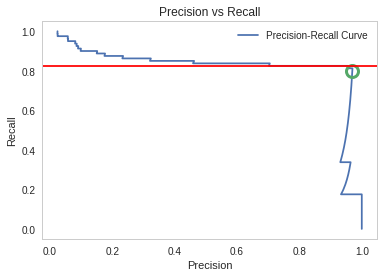

In [50]:
if VERBOSE:
    model = LogisticRegression()
    model.fit(X_train, y_train)
    y_scores = model.decision_function(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    closest_zero = np.argmin(np.abs(thresholds))
    closest_zero_precision = precision[closest_zero]
    closest_zero_recall = recall[closest_zero]
    index = numpy.where(precision==0.75)[0][0]
    recall_at_precision = recall[index]
    figure = plot.figure()
    axe = figure.gca()
    axe.plot(precision, recall, label="Precision-Recall Curve")
    axe.plot(closest_zero_precision, closest_zero_recall, "o", markersize=12, mew=3, fillstyle='none')
    axe.set_xlabel("Precision")
    axe.set_ylabel("Recall")
    axe.axhline(recall_at_precision, color="r")
    axe.legend()
    title = axe.set_title("Precision vs Recall")


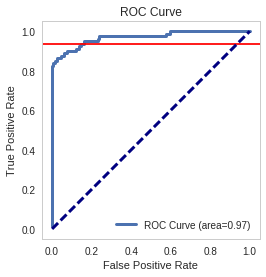

In [51]:
y_score_lr = model.predict_proba(X_test)
false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_score_lr[:, 1])
area_under_the_curve = auc(false_positive_rate, true_positive_rate)
index = numpy.where(numpy.round(false_positive_rate, 2)==0.16)[0][0]
figure = plot.figure()
axe = figure.gca()
axe.plot(false_positive_rate, true_positive_rate, lw=3, label="ROC Curve (area={0:.2f})".format(area_under_the_curve))
axe.axhline(true_positive_rate[index], color='r')
axe.set_xlabel("False Positive Rate")
axe.set_ylabel("True Positive Rate")
axe.set_title("ROC Curve")
axe.plot([0, 1], [0, 1], color='navy', lw=3, linestyle='--')
axe.legend()
axe.set_aspect('equal')

In [52]:
def true_positive_where_false(model, threshold):
    """get the true-positive value matching the threshold for false-positive

    Args:
     model: the model fit to the data with predict_proba method

    Return:
     float: True Positive rate
    """
    y_score_lr = model.predict_proba(X_test)
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_score_lr[:, 1])
    index = numpy.where(numpy.round(false_positive_rate, 2)==0.16)[0][0]
    return true_positive_rate[index]

In [53]:
def recall_where_precision(model, threshold):
    """return recall where the first precision matches threshold

    Args:
     model: model fit to the data with decision_function
     threshold (float): point to find matching recall

    Returns:
     float: recall matching precision threshold
    """
    y_scores = model.decision_function(X_test)
    precision, recall, thresholds = precision_recall_curve(y_test, y_scores)
    return recall[numpy.where(precision==threshold)[0][0]]
    

In [54]:
def answer_five():
    model = LogisticRegression()
    model.fit(X_train, y_train)
    recall_score = recall_where_precision(model, 0.75)
    true_positive = true_positive_where_false(model, threshold=0.16)
    return (recall_score, true_positive)

In [55]:
answer_five()

(0.82499999999999996, 0.9375)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [64]:
parameters = dict(penalty=["l1", "l2"], C=[10**power for power in range(-2, 3)])
model = LogisticRegression()

In [66]:
grid = GridSearchCV(model, parameters, scoring="recall")
grid.fit(X_train, y_train)

array([ 0.66666667,  0.76086957,  0.80072464,  0.80434783,  0.8115942 ,
        0.8115942 ,  0.80797101,  0.8115942 ,  0.80797101,  0.80797101])

In [70]:
grid.cv_results_

{'mean_fit_time': array([ 0.06554151,  0.15119346,  0.08552376,  0.25688934,  0.19557826,
         0.30026897,  0.35302273,  0.3494637 ,  0.41603518,  0.33034245]),
 'mean_score_time': array([ 0.00501728,  0.00636093,  0.00718864,  0.0039107 ,  0.00374627,
         0.01111237,  0.00343434,  0.00365861,  0.00851393,  0.00238625]),
 'mean_test_score': array([ 0.66666667,  0.76086957,  0.80072464,  0.80434783,  0.8115942 ,
         0.8115942 ,  0.80797101,  0.8115942 ,  0.80797101,  0.80797101]),
 'mean_train_score': array([ 0.68115942,  0.77355072,  0.80615942,  0.8134058 ,  0.81884058,
         0.81702899,  0.82427536,  0.82427536,  0.82427536,  0.82427536]),
 'param_C': masked_array(data = [0.01 0.01 0.1 0.1 1 1 10 10 100 100],
              mask = [False False False False False False False False False False],
        fill_value = ?),
 'param_penalty': masked_array(data = ['l1' 'l2' 'l1' 'l2' 'l1' 'l2' 'l1' 'l2' 'l1' 'l2'],
              mask = [False False False False False False Fals

In [72]:
len(grid.cv_results_["mean_test_score"])

10

In [77]:
grid.cv_results_
l1 = [grid.cv_results_["mean_test_score"][index] for index in range(0, len(grid.cv_results_['mean_test_score']), 2)]
l2 = [grid.cv_results_["mean_test_score"][index] for index in range(1, len(grid.cv_results_["mean_test_score"])+ 1, 2)]
l1

[0.66666666666666663,
 0.80072463768115953,
 0.81159420289855078,
 0.80797101449275355,
 0.80797101449275355]

In [78]:
l2

[0.76086956521739124,
 0.80434782608695654,
 0.81159420289855078,
 0.81159420289855089,
 0.80797101449275355]

In [81]:
def answer_six():    
    parameters = dict(penalty=["l1", "l2"], C=[10**power for power in range(-2, 3)])
    model = LogisticRegression()
    grid = GridSearchCV(model, parameters, scoring="recall")
    grid.fit(X_train, y_train)
    l1 = [grid.cv_results_["mean_test_score"][index] for index in range(0, len(grid.cv_results_['mean_test_score']), 2)]
    l2 = [grid.cv_results_["mean_test_score"][index] for index in range(1, len(grid.cv_results_["mean_test_score"])+ 1, 2)]
    return numpy.array([l1, l2]).T

In [82]:
answer_six()

array([[ 0.66666667,  0.76086957],
       [ 0.80072464,  0.80434783],
       [ 0.8115942 ,  0.8115942 ],
       [ 0.80797101,  0.8115942 ],
       [ 0.80797101,  0.80797101]])

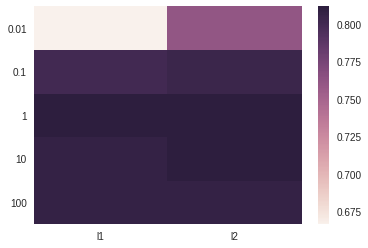

In [86]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib inline
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    scores = answer_six()
    sns.heatmap(scores, xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

if VERBOSE:
    GridSearch_Heatmap(answer_six())